In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

In [3]:
pd.options.display.max_columns = None

# Pair Programming Limpieza III

Hipótesis
1. La edad, el trabajo, el estado civil, la educación, la situación de deuda y la forma de contacto pueden influir en la probabilidad de que un cliente acepte la oferta.
2. El número de veces que se ha contactado a un cliente en el pasado (campo campaign), el número de días que han pasado desde el último contacto (campo pdays), y el resultado de la campaña anterior (campo poutcome) pueden afectar la respuesta del cliente a una nueva oferta.
3. Las variables económicas (tales como el índice de precios al consumidor (cons.price.idx), la tasa de variación del empleo (emp.var.rate), etc.) pueden influir en la probabilidad de que un cliente acepte la oferta.
4. Los clientes que ya tienen una hipoteca (housing) o un préstamo (loan) pueden ser menos propensos a aceptar una nueva oferta, ya que podrían estar limitados financieramente.

Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. Por lo tanto, en este ejercicio tendremos que limpiar los outliers.

1. ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [5]:
df = pd.read_csv("datos/bank_additional_editado.csv", index_col = 0)
df.head(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,month_day_week,month,day
0,56,housemaid,married,basic 4y,no,no,no,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']",may,mon
1,57,services,married,high school,NaN,no,no,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']",may,mon


In [7]:
df_num = df.select_dtypes(include=np.number)
df_num.sample()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
18026,59,81,1,999,0,1.4,93.918,-42.7,4.963,5228.1


2. Identifica visualmente los outliers

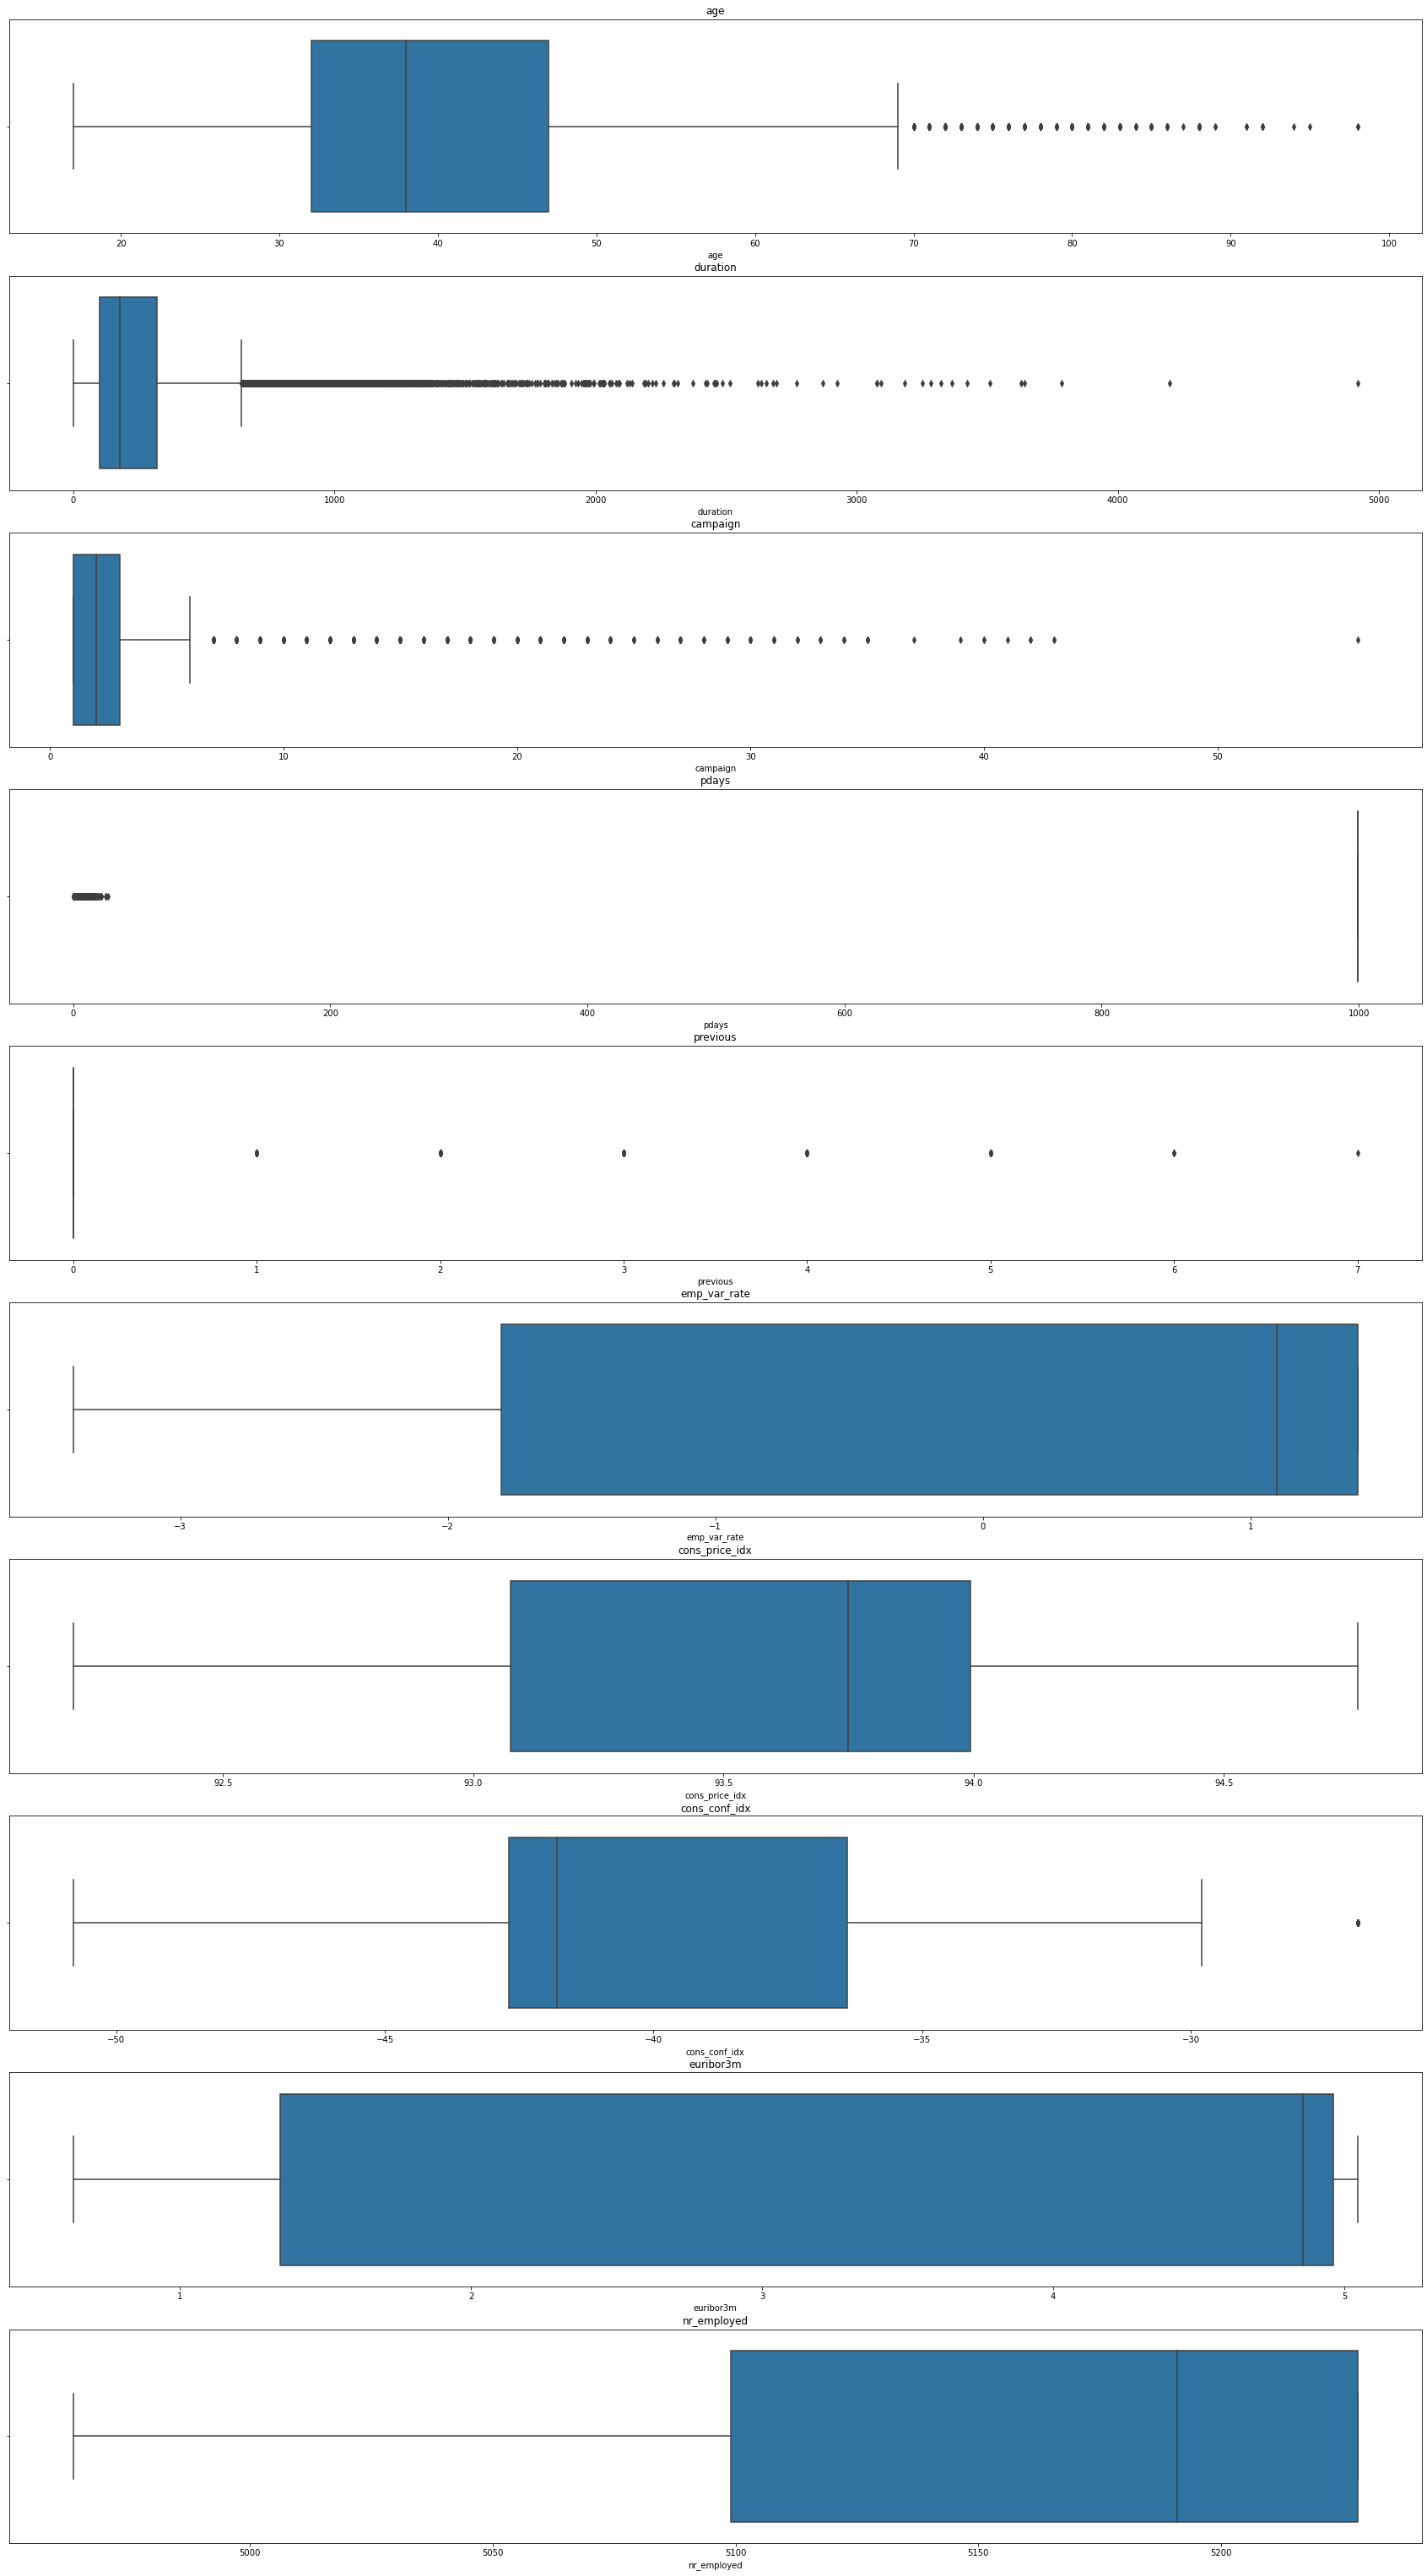

In [15]:
fig, ax = plt.subplots(len(df_num.columns), figsize=(30,55))

for i, col in enumerate(df_num.columns):
    sns.boxplot(x=df_num[col], data=df_num, ax=ax[i])
    ax[i].set_title(col)
plt.show();

3. Identifica sobre el dataframe las filas que son outliers

In [23]:
def outliers(dataframe, lista):
    diccionario={}
    for col in lista:
        q1, q3 = np.nanpercentile(dataframe[col], [25, 75])
        
        iqr = q3 - q1
        
        outlier_step = 1.5 * iqr
        
        df_outliers = dataframe[(dataframe[col] < q1 - outlier_step) | (dataframe[col] > q3 + outlier_step)]
        
        if df_outliers.shape[0] > 0:
            diccionario[col] = list(df_outliers.index)
            
    return diccionario

In [22]:
lista_columnas_num = df_num.columns.tolist()
lista_columnas_num

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed']

In [24]:
indices_outliers = outliers(df_num, lista_columnas_num)
indices_outliers

{'age': [27713,
  27757,
  27780,
  27800,
  27802,
  27805,
  27808,
  27810,
  27811,
  27812,
  27813,
  27814,
  27815,
  27816,
  27817,
  27818,
  27826,
  27837,
  27838,
  27844,
  27851,
  27875,
  27879,
  27902,
  27930,
  27950,
  27951,
  27963,
  28220,
  28221,
  28312,
  28456,
  28504,
  28530,
  28540,
  28586,
  28619,
  28732,
  28773,
  29225,
  29263,
  29498,
  29625,
  29668,
  29682,
  29973,
  29977,
  29981,
  29987,
  29990,
  30000,
  30004,
  30006,
  30072,
  30078,
  30079,
  30088,
  30103,
  30110,
  30133,
  30171,
  30214,
  30225,
  30227,
  30241,
  30334,
  30335,
  30390,
  30430,
  30460,
  30589,
  35833,
  35848,
  35856,
  35878,
  35973,
  36183,
  36285,
  36311,
  36383,
  36384,
  36816,
  36998,
  37136,
  37137,
  37170,
  37186,
  37190,
  37192,
  37193,
  37195,
  37206,
  37207,
  37213,
  37219,
  37227,
  37235,
  37237,
  37239,
  37257,
  37260,
  37316,
  37341,
  37355,
  37371,
  37403,
  37454,
  37455,
  37472,
  37479,
  3

In [31]:
for k, v in indices_outliers.items():
    print(f'numero de outliers en la columna {k}: {len(indices_outliers[k])}')

numero de outliers en la columna age: 468
numero de outliers en la columna duration: 2963
numero de outliers en la columna campaign: 2406
numero de outliers en la columna pdays: 1515
numero de outliers en la columna previous: 5625
numero de outliers en la columna cons_conf_idx: 446


4. Reemplaza los outliers por el estadístico más correcto.

In [32]:
for key, values in indices_outliers.items():
    mediana = df_num[key].median()
    for i in values:
        df.loc[i,key] = mediana

In [35]:
df.sample(20)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,month_day_week,month,day
26373,36,technician,married,professional course,no,si,no,cellular,180,1,999,0,NONEXISTENT,-0.1,93.200,-42.0,4.076,5195.8,no,"['nov', 'thu']",nov,thu
32900,45,management,married,basic 9y,NaN,si,no,cellular,288,1,999,0,FAILURE,-1.8,92.893,-46.2,1.299,5099.1,no,"['may', 'mon']",may,mon
5235,36,blue-collar,married,basic 6y,NaN,no,no,telephone,378,2,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'fri']",may,fri
19497,36,technician,married,university degree,no,si,no,cellular,131,1,999,0,NONEXISTENT,1.4,93.444,-36.1,4.968,5228.1,no,"['aug', 'thu']",aug,thu
15074,27,blue-collar,single,basic 9y,no,no,no,cellular,324,1,999,0,NONEXISTENT,1.4,93.918,-42.7,4.958,5228.1,no,"['jul', 'thu']",jul,thu
25275,44,services,married,high school,NaN,no,no,cellular,43,2,999,0,NONEXISTENT,-0.1,93.200,-42.0,4.153,5195.8,no,"['nov', 'tue']",nov,tue
39167,52,services,married,high school,NaN,si,no,cellular,177,2,999,0,FAILURE,-1.8,93.369,-34.8,0.654,5008.7,yes,"['mar', 'thu']",mar,thu
29884,29,technician,single,NaN,no,no,no,cellular,415,2,999,0,NONEXISTENT,-1.8,93.075,-47.1,1.405,5099.1,no,"['apr', 'mon']",apr,mon
7559,32,administration,single,university degree,NaN,no,no,telephone,96,3,999,0,NONEXISTENT,1.1,93.994,-36.4,4.864,5191.0,no,"['may', 'fri']",may,fri
21896,40,technician,single,professional course,no,no,no,cellular,113,2,999,0,NONEXISTENT,1.4,93.444,-36.1,4.964,5228.1,no,"['aug', 'wed']",aug,wed


In [38]:
df['pdays'].value_counts()

999    41176
Name: pdays, dtype: int64

In [37]:
df['previous'].value_counts()

0    41176
Name: previous, dtype: int64

5. Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [40]:
df.to_csv('datos/bank_additional_sin_outliers.csv')